In [567]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [502]:
def funcao_a_minimizar(x):
    return x**2 - 0.3*np.cos(10*np.pi*x)

def init_indv_rand(num_bits):
    return [int(bool(b)) for b in np.random.randint(2, size=num_bits)]

def eval_pop_rand(num_indv, num_bits):
    return np.array(list(map(lambda i: init_indv_rand(num_bits),range(num_indv))))

def bin_from_gray(g):
    b = [g[-1]]
    for n in g[-2::-1]:
        b.insert(0, b[0]^n)
    return b
    
def eval_fenotipo(cromossomo, num_bits):
    b = bin_from_gray(cromossomo)
    u = sum(2**k for k in range(num_bits) if b[k])
    u /= 2**num_bits
    return -2 + 4 * u   

def eval_fitness(populacao):
    return list(map(lambda i: funcao_a_minimizar(eval_fenotipo(list(populacao[i,:]),len(populacao[0]))),range(len(populacao))))

def parent_selection(populacao, fitness, num_parents):
    fitness = 100 - np.array(fitness)
    pre_a = (fitness/sum(fitness))
    a = np.cumsum(pre_a)
    mating_pool = []
    current_member = 1
    ue = 1
    r = np.random.uniform(0,1/num_parents)
    while (current_member <= num_parents):
        while (r <= a[ue]):
            mating_pool.append(populacao[ue].tolist())
            r = r + 1/num_parents
            current_member = current_member + 1
        ue = ue + 1
    return np.array(mating_pool)

def binary_mutation(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if np.random.uniform(0,1) < mutation_rate:
            chromosome[i] = int(not(chromosome[i]))
    return np.array(chromosome)

def eval_bin_mutation(mating_pool, mutation_rate):
    return np.array(list(map(lambda i: binary_mutation(mating_pool[i],mutation_rate),range(len(mating_pool)))))

def one_pt_crossover(parents, crossover_rate):
    i, j = np.random.choice(range(len(parents)),2)
    if np.random.uniform(0,1) < crossover_rate:
        xchg_pt = np.random.choice(range(len(parents[0])))
        child_a = np.hstack((parents[i][:xchg_pt],parents[j][xchg_pt:]))
        child_b = np.hstack((parents[j][:xchg_pt],parents[i][xchg_pt:]))
    else:
        child_a = parents[i]
        child_b = parents[j]
    return np.array((child_a, child_b))

def eval_onept_crossover(parents, crossover_rate, num_crossover):
    return np.concatenate(list(map(lambda i: one_pt_crossover(parents, crossover_rate),range(num_crossover))))
    

# 1ª Questão

In [519]:
num_bits = 16
num_indv = 100
num_parents = 50
mutation_rate = 0.2
crossover_rate = 0.7
num_crossover = int(num_indv/2)
num_geracoes = 1000

populacao = constroi_pop_rand(num_indv, num_bits)
pop_fitness = eval_fitness(populacao)
best_x = min(pop_fitness)
for n in range(num_geracoes):
    mating_pool = parent_selection(populacao, pop_fitness, num_parents)
    parents_xover = eval_onept_crossover(mating_pool, crossover_rate, num_crossover)
    parents_mut = eval_bin_mutation(parents_xover, mutation_rate)
    offspring_fitness = eval_fitness(parents_mut)
    if (min(offspring_fitness) < best_x):
        best_x = min(offspring_fitness)
        geracao = n
    populacao = offspring
    pop_fitness = eval_fitness(populacao)
print(f'O mínimo {best_x:.5} foi encontrado na geração de número {geracao + 1}.')   

O mínimo -0.3 foi encontrado na geração de número 957.


# 2ª Questão

In [521]:
def init_indv_rand(num_bits):
    return [int(bool(b)) for b in np.random.randint(2, size=num_bits)]

def eval_pop_rand(num_indv, num_bits):
    return np.array(list(map(lambda i: init_indv_rand(num_bits),range(num_indv))))

def eval_fenotipo(cromossomo, num_bits):
    return sum(cromossomo)

def eval_fitness(populacao):
    return list(map(lambda i: (eval_fenotipo(list(populacao[i,:]),len(populacao[0]))),range(len(populacao))))

def parent_selection(populacao, fitness, num_parents):
    fitness = np.array(fitness)
    pre_a = (fitness/sum(fitness))
    a = np.cumsum(pre_a)
    mating_pool = []
    current_member = 1
    ue = 1
    r = np.random.uniform(0,1/num_parents)
    while (current_member <= num_parents):
        while (r <= a[ue]):
            mating_pool.append(populacao[ue].tolist())
            r = r + 1/num_parents
            current_member = current_member + 1
        ue = ue + 1
    return np.array(mating_pool)

def binary_mutation(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if np.random.uniform(0,1) < mutation_rate:
            chromosome[i] = int(not(chromosome[i]))
    return np.array(chromosome)

def eval_bin_mutation(mating_pool, mutation_rate):
    return np.array(list(map(lambda i: binary_mutation(mating_pool[i],mutation_rate),range(len(mating_pool)))))

def one_pt_crossover(parents, crossover_rate):
    i, j = np.random.choice(range(len(parents)),2)
    if np.random.uniform(0,1) < crossover_rate:
        xchg_pt = np.random.choice(range(len(parents[0])))
        child_a = np.hstack((parents[i][:xchg_pt],parents[j][xchg_pt:]))
        child_b = np.hstack((parents[j][:xchg_pt],parents[i][xchg_pt:]))
    else:
        child_a = parents[i]
        child_b = parents[j]
    return np.array((child_a, child_b))

def eval_onept_crossover(parents, crossover_rate, num_crossover):
    return np.concatenate(list(map(lambda i: one_pt_crossover(parents, crossover_rate),range(num_crossover))))   

O máximo 24 foi encontrado na 8-ésima geração.


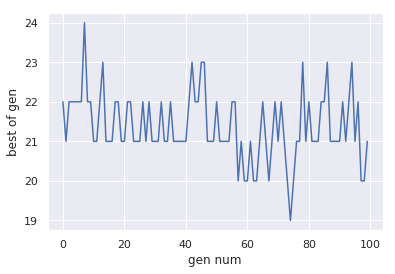

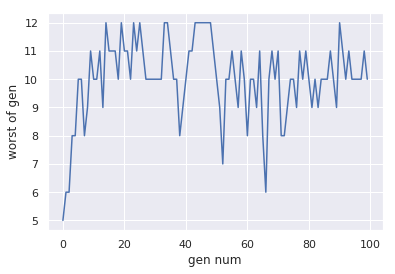

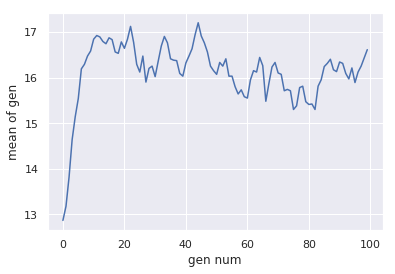

In [580]:
num_bits = 25
num_indv = 100
num_parents = 200
mutation_rate = 1/num_bits
crossover_rate = 0.7
num_crossover = int(num_indv/2)
num_geracoes = 100

populacao = constroi_pop_rand(num_indv, num_bits)
pop_fitness = eval_fitness(populacao)

best_x = max(pop_fitness)
best = np.zeros((num_geracoes))
worst = np.zeros((num_geracoes))
mean = np.zeros((num_geracoes))

for n in range(num_geracoes):
    mating_pool = parent_selection(populacao, pop_fitness, num_parents)
    parents_xover = eval_onept_crossover(mating_pool, crossover_rate, num_crossover)
    offspring = eval_bin_mutation(parents_xover, mutation_rate)
    offspring_fitness = eval_fitness(offspring)
    if (max(offspring_fitness) > best_x):
        best_x = max(offspring_fitness)
        geracao = n
        if best_x == num_bits:
            break
    populacao = offspring
    pop_fitness = eval_fitness(populacao)
    best[n] = max(offspring_fitness)
    worst[n] = min(offspring_fitness)
    mean[n] = np.mean(offspring_fitness)
print(f'O máximo {best_x} foi encontrado na {geracao + 1}-ésima geração.')   

sns.lineplot(range(num_geracoes), best)
plt.xlabel('gen num')
plt.ylabel('best of gen')
plt.savefig('best.eps',format='eps')
plt.show()

sns.lineplot(range(num_geracoes), worst)
plt.xlabel('gen num')
plt.ylabel('worst of gen')
plt.savefig('worst.eps',format='eps')
plt.show()

sns.lineplot(range(num_geracoes), mean)
plt.xlabel('gen num')
plt.ylabel('mean of gen')
plt.savefig('mean.eps',format='eps')
plt.show()